# Python Tutorial

This is a tutorial on how to use jupyter as python-trainning plataform. 
The goal is to get used to how to use a Jupyter Notebook and to perform 
a basic tutorial on image processing using the module openCv

In [1]:
import cv2 as cv
import os
import matplotlib.pyplot as plt

print("Libraries ok!")

Libraries ok!


In [2]:
cwd = os.getcwd()
my_image = "lenna.png"
image_path = os.path.join(cwd,my_image)
image_path_andrea = os.path.join(cwd,'andrea.png')

In [3]:
image = cv.imread(image_path)
andrea = cv.imread(image_path_andrea)
image_gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
andrea_gray = cv.cvtColor(andrea,cv.COLOR_BGR2GRAY)

#Converting from BGR to RGB - Remember that CV2 library imports as BGR
im_rgb = cv.cvtColor(image,cv.COLOR_BGR2RGB)

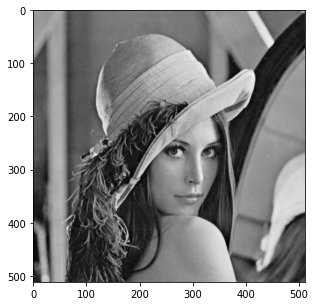

In [4]:
plt.figure(figsize=(5,5))
plt.imshow(im_rgb)
plt.imshow(image_gray,cmap='gray')
plt.show()

(512, 512) 512 512


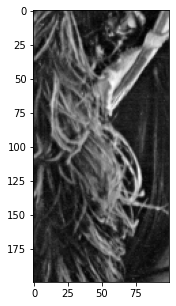

In [5]:
#Cropping an image - Let's crop part of the gray image

#some useful methods
(image_grayX,image_grayY) = image_gray.shape
print(image_gray.shape,image_grayX,image_grayY)
#Extacting Lenna's face
image_crop = image_gray[300:500,100:200]


plt.figure(figsize=(5,5))
plt.imshow(image_crop,cmap='gray')
plt.show()

#Filters and Templates

Correlação Normalizada ; Template matching 

Pense como uma máscara em que desejamos identificar um objeto em uma imagem. Algo bem simples.

É necessário duas imagens para fazer um 'template matching' (correlação normalizada)


200 100
(100, 300)


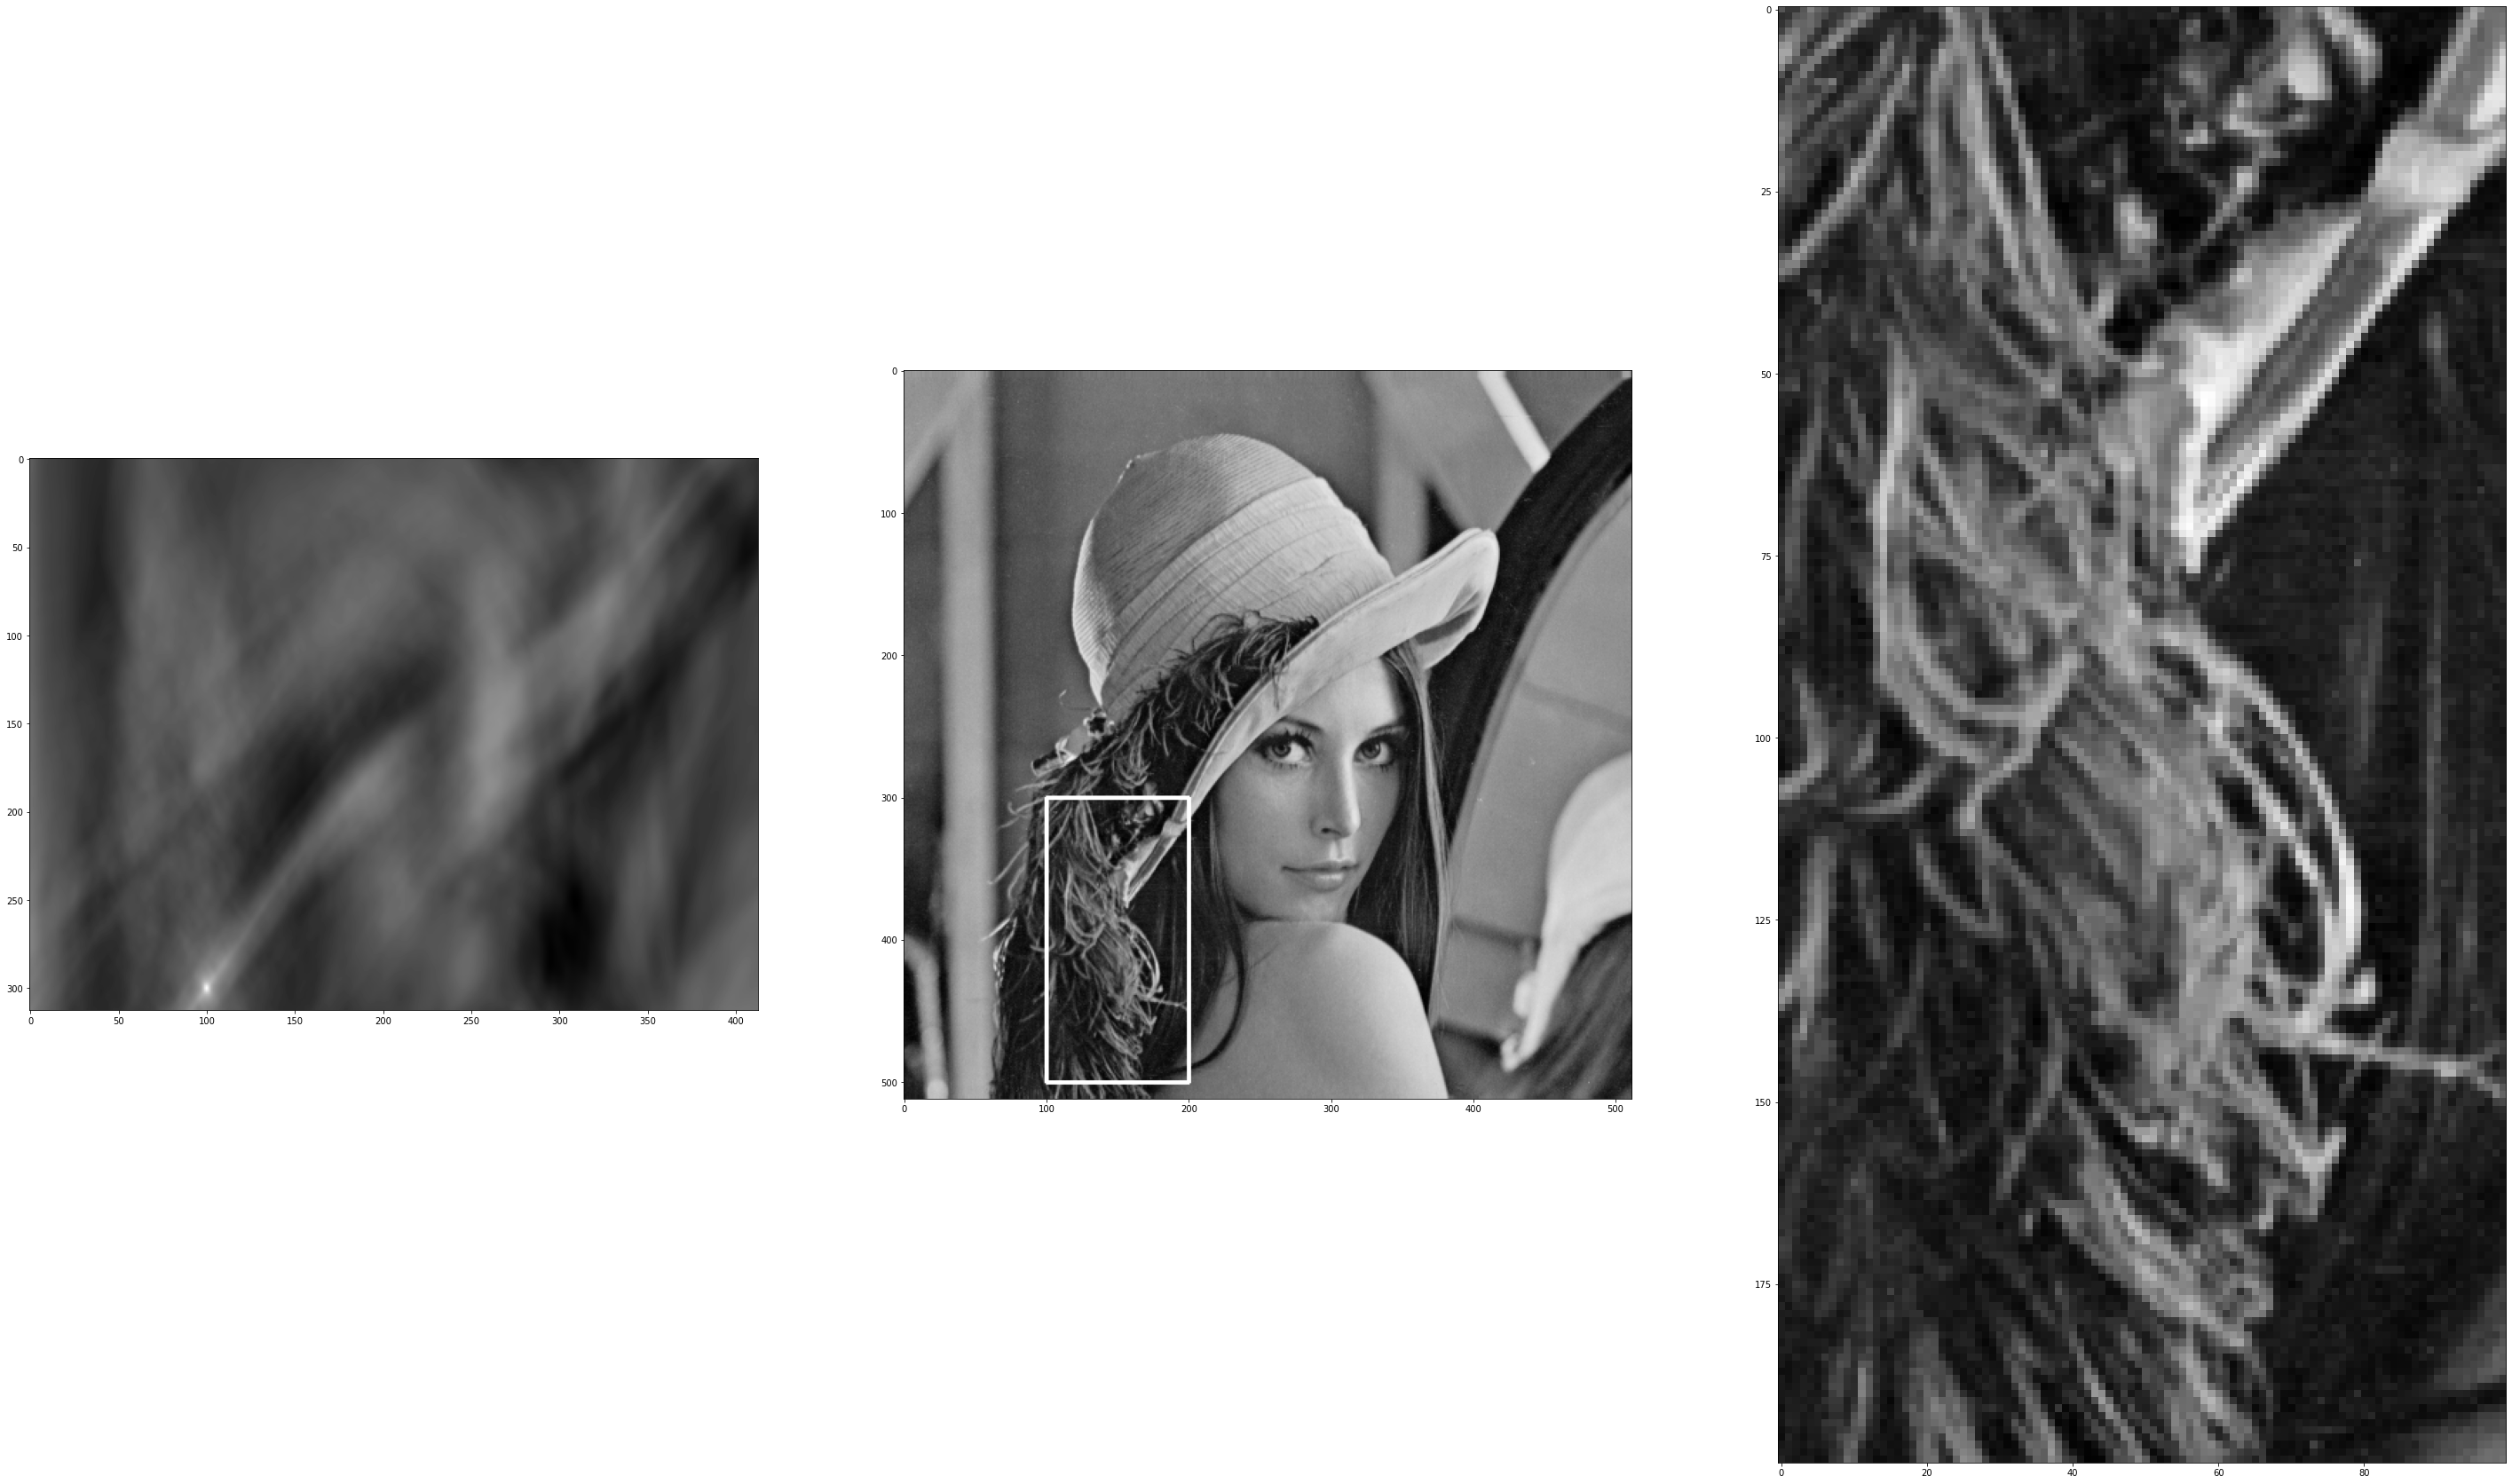

In [6]:
img = image_gray.copy()
template = image_crop.copy()
w, h = template.shape
print(w,h)

res = cv.matchTemplate(img,image_crop,cv.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
print(max_loc)
#PA

#Usamos a função retangulo para identificar o ponto da figura - A função imprime um retangulo na matriz da figura
#As coordenadas do vérticies superiores e inferiores do retangulo são encontradas
# com base nas dimensões da máscara
top_left = max_loc
bottom_right = (top_left[0]+h,top_left[1]+w)
cv.rectangle(img, top_left, bottom_right, (255,0,0), 2)


plt.figure(figsize=(50,50))
plt.subplot(131),plt.imshow(res,cmap = 'gray')
plt.subplot(132),plt.imshow(img,cmap = 'gray')
plt.subplot(133),plt.imshow(template,cmap = 'gray')
plt.show()

In [7]:
import plotly.graph_objects as go
import numpy as np



z = image_gray.copy()


x = np.arange(0,z.shape[0],1)
y = np.arange(0,z.shape[1],1)

fig = go.Figure(data=[go.Surface(z=z,x=x,y=y)])

fig.show()



 O template matching é uma técnica excelente para identificar padrões de objetos que não mudam. Por exemplo, elementos de UI em um print de tela.

 

# Edge Detection: Gradients



(<AxesSubplot:title={'center':'y Border Detextion'}>,
 Text(0.5, 1.0, 'y Border Detextion'))

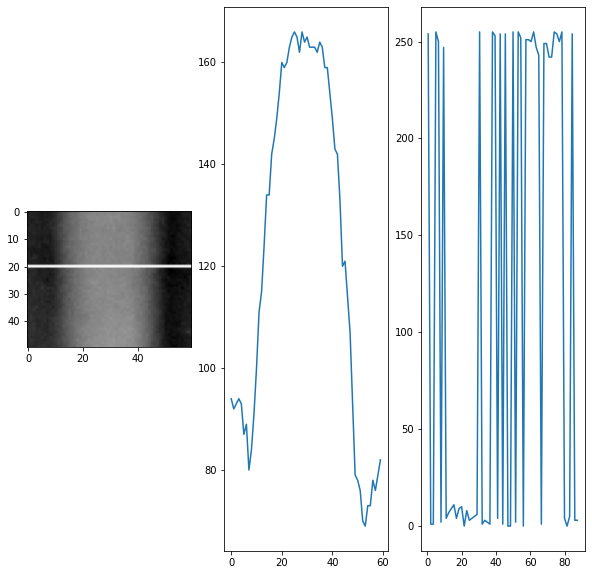

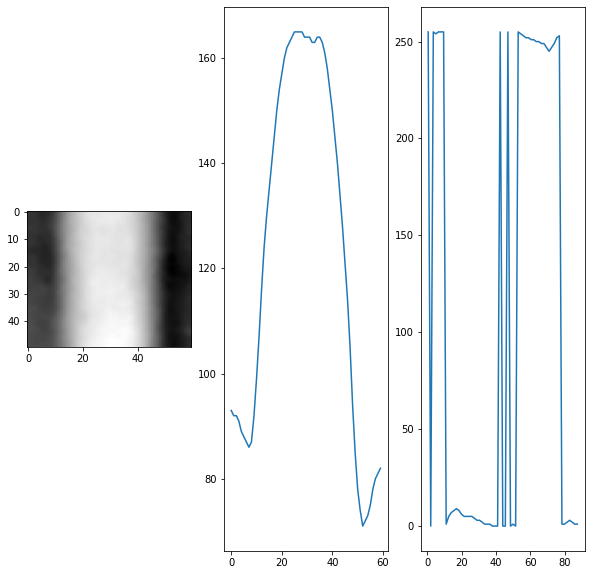

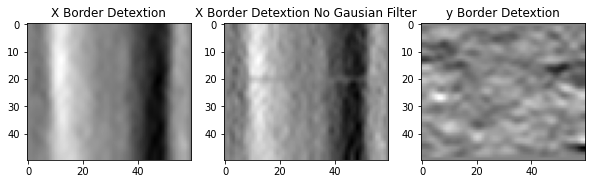

In [8]:
#Consider the following portion of the image:
image_portion = image_gray[100:150,15:75].copy()
image_portion_blur = cv.GaussianBlur(image_portion,(5,5),0)

x = np.arange(0,60,1)
y = image_portion[20,:].copy()

#Computing Derivative
yp= np.diff(y) /np.diff(x)
xp = np.array(x[:-1]) + np.array(x[1:])/2

plt.figure(figsize=(10,10))
cv.line(image_portion,(0,20),(75,20),(255,0,0))
plt.subplot(131),plt.imshow(image_portion,cmap="gray")
plt.subplot(132),plt.plot(x,y)
plt.subplot(133),plt.plot(xp,yp)


#Reducing noise with gaussian blur
x = np.arange(0,60,1)
y = image_portion_blur[20,:].copy()
#Computing Derivative
yp= np.diff(y) /np.diff(x)
xp = np.array(x[:-1]) + np.array(x[1:])/2
plt.figure(figsize=(10,10))
cv.line(image_portion,(0,20),(75,20),(255,0,0))
plt.subplot(131),plt.imshow(image_portion_blur,cmap="gray")
plt.subplot(132),plt.plot(x,y)
plt.subplot(133),plt.plot(xp,yp)
y.shape


#To test the image gradients, we will use the sobel function
sobelx = cv.Sobel(src=image_portion_blur,ddepth=cv.CV_64F,dx=1,dy=0,ksize=5)
sobelx_raw = cv.Sobel(src=image_portion,ddepth=cv.CV_64F,dx=1,dy=0,ksize=5)
sobely = cv.Sobel(src=image_portion_blur,ddepth=cv.CV_64F,dx=0,dy=1,ksize=5)
plt.figure(figsize=(10,10))
cv.line(image_portion,(0,20),(75,20),(255,0,0))
plt.subplot(131),plt.imshow(sobelx,cmap="gray"),plt.title("X Border Detextion")
plt.subplot(132),plt.imshow(sobelx_raw,cmap="gray"),plt.title("X Border Detextion No Gausian Filter")
plt.subplot(133),plt.imshow(sobely,cmap="gray"),plt.title("y Border Detextion")

# Image Denoising - Gaussian Blur




# Sobel Operator

# Derivatives of dicrete signals
How do we compute the derivative of discrete signals? Consider the following signal: [10, 20, 10, 200, 210, 250, 250]
If we were to compute the 'central diference' in the sample '200' that would be: f' = (210-10)/2 = 100 .

Note that what we did was to weight the left(10) and the right(210) position of the sample.
 
# Edge Detection 2D Operators

## Canny Edge Operator
It can be refered as an edge detection algorith broken into different stages

### 1. Noise Reduction
Remove noise in the image by using a 5x5 gaussian filter

    


